In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
cal_fire_data = pd.read_csv("../data/cal_fire_data_cleaned.csv")
cal_fire_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42789 entries, 0 to 42788
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   * Structure Type                             42789 non-null  object 
 1   * Roof Construction                          42789 non-null  object 
 2   * Eaves                                      42789 non-null  object 
 3   * Vent Screen                                42789 non-null  object 
 4   * Exterior Siding                            42789 non-null  object 
 5   * Window Pane                                42789 non-null  object 
 6   * Deck/Porch On Grade                        42789 non-null  object 
 7   * Deck/Porch Elevated                        42789 non-null  object 
 8   * Patio Cover/Carport Attached to Structure  42789 non-null  object 
 9   * Fence Attached to Structure                42789 non-null  object 
 10

In [3]:
cal_fire_data = pd.get_dummies(cal_fire_data, columns=cal_fire_data.select_dtypes('object').columns)
cal_fire_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42789 entries, 0 to 42788
Data columns (total 59 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Assessed Improved Value (parcel)                                    42789 non-null  float64
 1   Latitude                                                            42789 non-null  float64
 2   Longitude                                                           42789 non-null  float64
 3   Age                                                                 42789 non-null  float64
 4   Destroyed                                                           42789 non-null  int64  
 5   * Structure Type_Church                                             42789 non-null  bool   
 6   * Structure Type_Commercial Building Multi Story                    42789 non-null  bool   
 7   * Structure T

In [4]:
from sklearn.model_selection import train_test_split
fire_train, fire_test = train_test_split(cal_fire_data, test_size=0.2, shuffle=True, random_state=216, stratify=cal_fire_data['Destroyed'])
fire_train['Destroyed'].value_counts(normalize=True)


Destroyed
0    0.597616
1    0.402384
Name: proportion, dtype: float64

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold


In [6]:
gbc = GradientBoostingClassifier()
gbc.fit(fire_train.drop(columns='Destroyed'), fire_train.Destroyed)
gbc.estimators_


array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x13D244640)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x13D244640)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x13D244640)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x13D244640)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x13D244640)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x13D244640)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                         

In [7]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

preds = gbc.predict(fire_test.drop(columns='Destroyed'))
baseline_test_acc = accuracy_score(fire_test.Destroyed, preds)
baseline_test_balanced_acc = balanced_accuracy_score(fire_test.Destroyed, preds)
print(baseline_test_acc)
print(baseline_test_balanced_acc)


0.8749707875671886
0.8575242271212589


In [8]:
probabilities = gbc.predict_proba(fire_test.drop(columns='Destroyed'))
print(probabilities)


[[0.48258932 0.51741068]
 [0.10839422 0.89160578]
 [0.05175612 0.94824388]
 ...
 [0.84654825 0.15345175]
 [0.85829497 0.14170503]
 [0.90336624 0.09663376]]


In [9]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [10]:
print(precision_score(fire_test.Destroyed, gbc.predict(fire_test.drop(columns='Destroyed')), average=None))
print(recall_score(fire_test.Destroyed, gbc.predict(fire_test.drop(columns='Destroyed')), average=None))
print(f1_score(fire_test.Destroyed, gbc.predict(fire_test.drop(columns='Destroyed')), average=None))


[0.85853572 0.90675351]
[0.94682307 0.76822538]
[0.90052064 0.83176101]


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


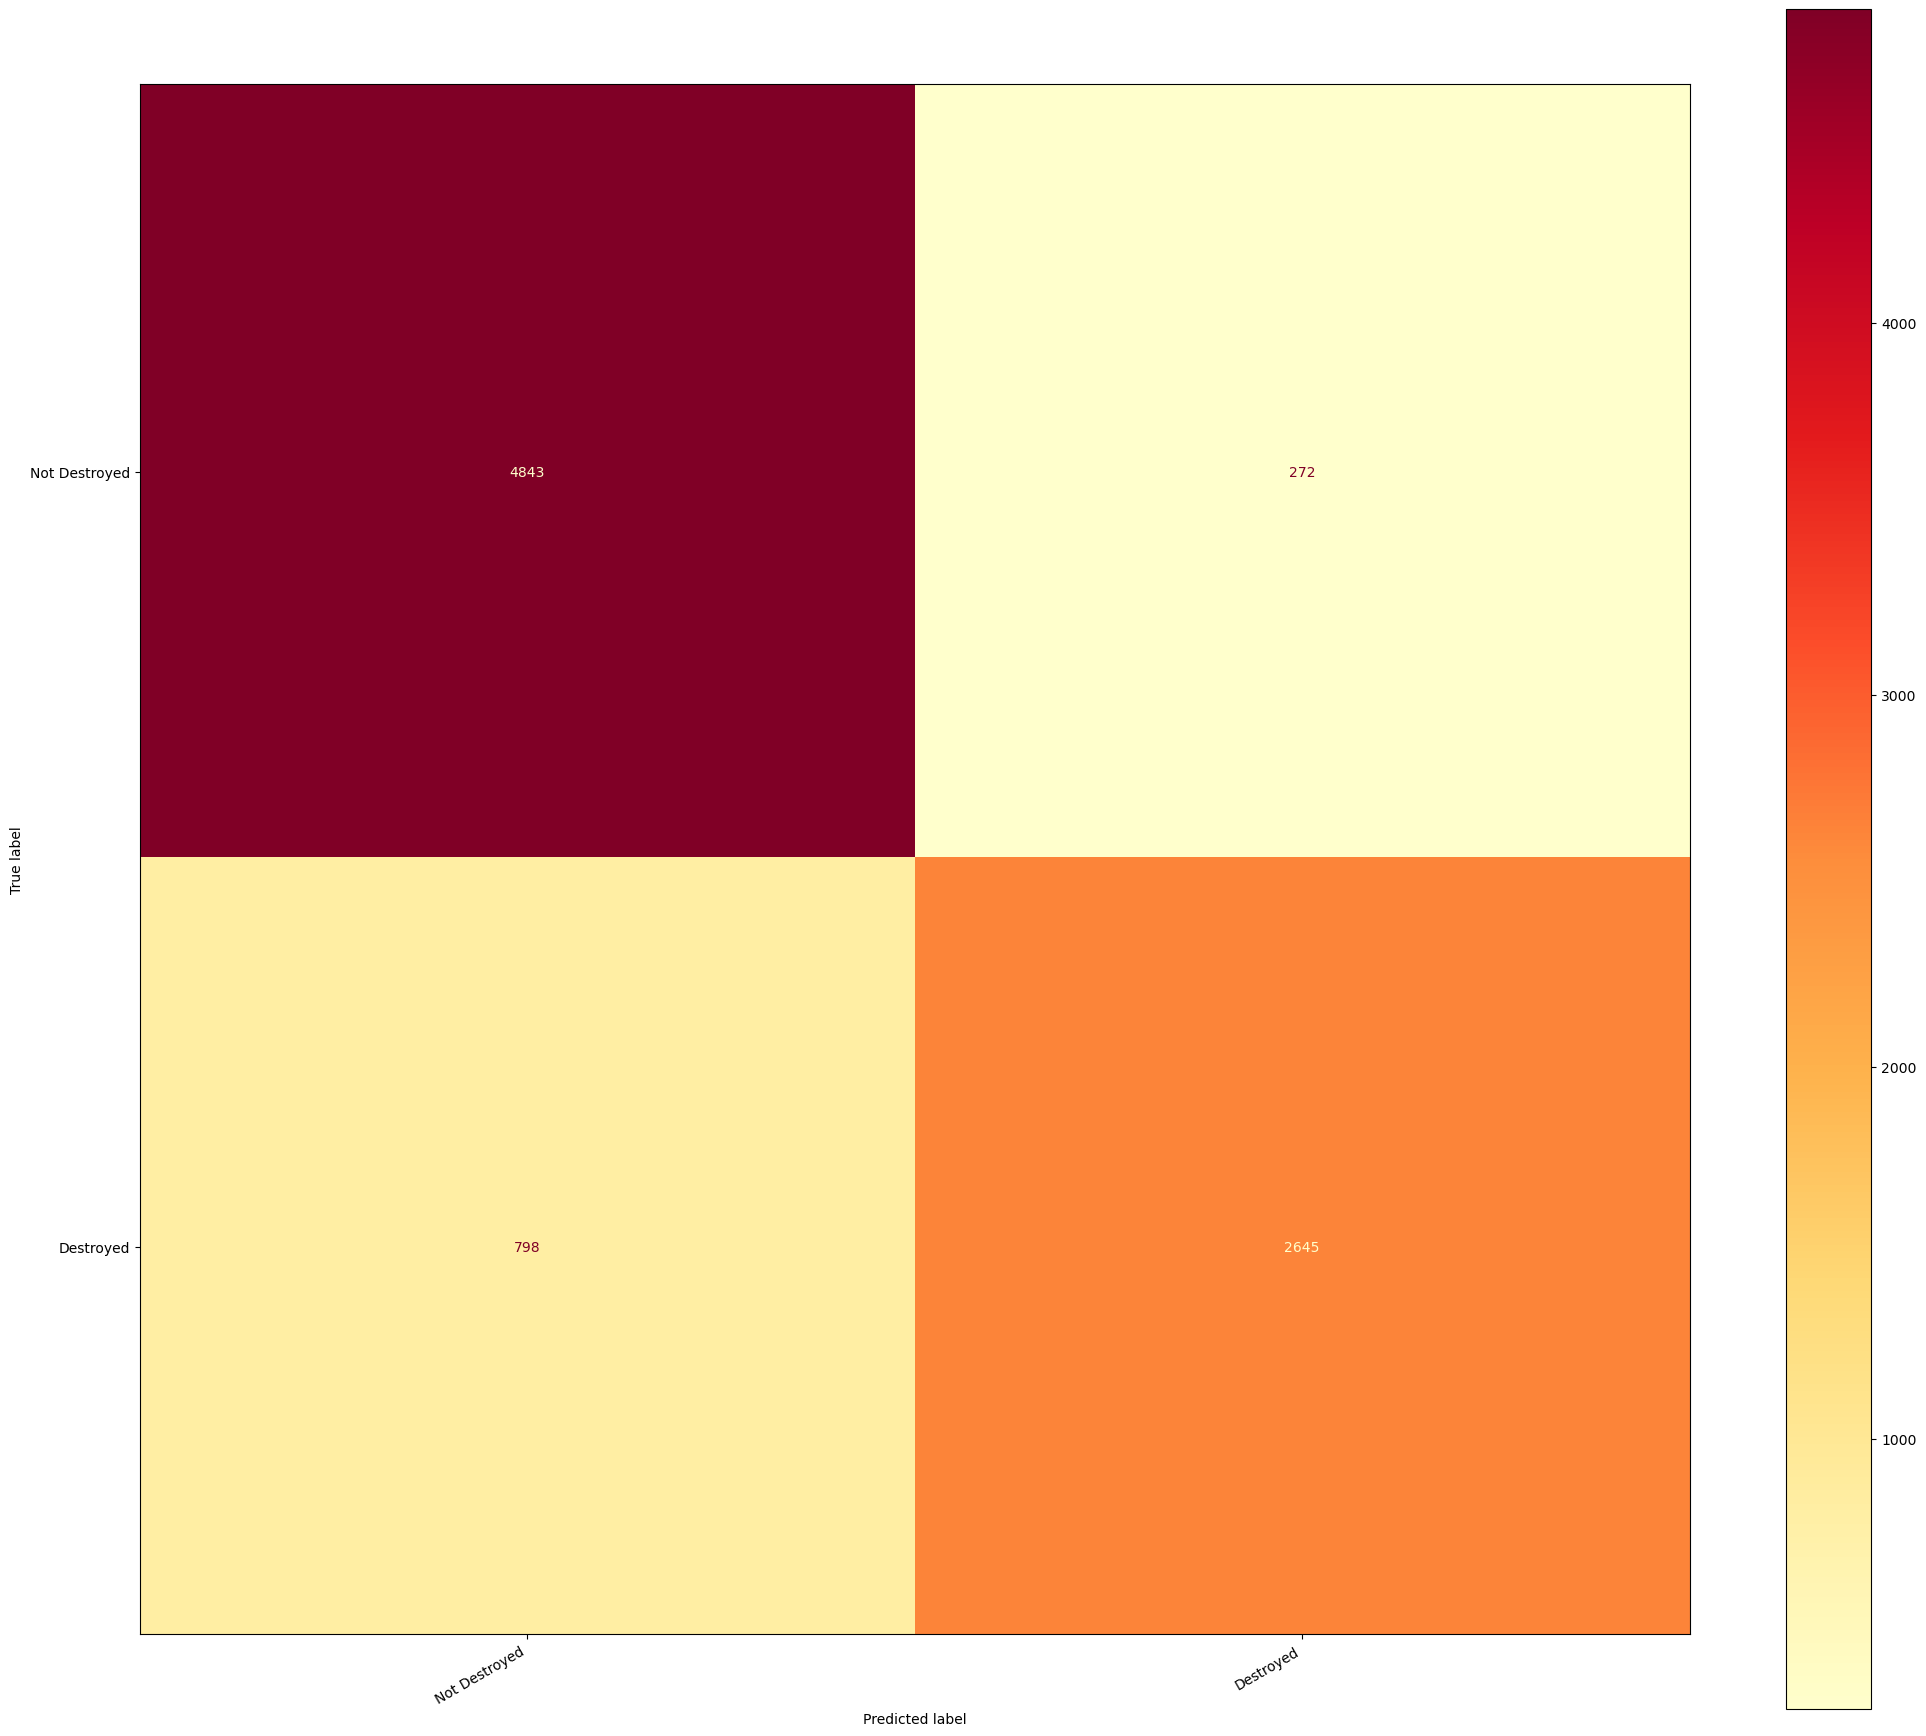

In [12]:
cm = confusion_matrix(fire_test.Destroyed, gbc.predict(fire_test.drop(columns='Destroyed')))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Destroyed', 'Destroyed'])
fig, ax = plt.subplots(figsize=(25, 25))
disp.plot(ax=ax, cmap='YlOrRd')
fig.autofmt_xdate()
plt.show()
